<a href="https://colab.research.google.com/github/revanthsonu/self-Proj-s/blob/master/Netflix_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
netflix = pd.read_csv("/content/netflix.csv")

In [70]:
netflix.shape # number rows = 8807 and number of columns = 12

(8807, 12)

netflix.shape # number rows = 8807 and number of columns = 12

In [71]:
# Data preparation and Cleaning
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Some columns like director, cast, country, date_added, rating, duration are having the null values

In [72]:
netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [73]:
netflix.describe(include="object")

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


From the above description we can see that total count records are 8807, we can also see the details like Movie
got repeated for 6131 times and most frequent director is Rajiv chilaka. Among all countries United nations have
highest number of Movies or TV shows. We can observe that most movies/TV shows got added into netflix during the
period of January 2020. Among all genre, Dramas and International Movies are much being watched my subscribers

In [74]:
netflix.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

The above cell tells about the number of unique values are present in each columns of the table

In [75]:
netflix.head() # Printing the top 5 record of the data set

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [76]:
df = netflix.copy() # In order to not to lose the data let's save in another veriable(deep copy)

In [77]:
# Convert date_added to datetime(DD-MM-YYYY) format
df["date_added"] = pd.to_datetime(df["date_added"])

In the above cell we are trying to convert the Object data form to the datetime format

In [78]:
df.drop("description", axis=1, inplace=True)# deleting the unnecessary column

In the above cell we deleting the column which is not required for our exploration purpose

In [79]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [80]:
# Handling the null values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
dtype: int64

In the above table it shows the columns with the count of null values present in that particular column

In [81]:
df.isnull().sum().sum() # Prints the total number of null values

4307

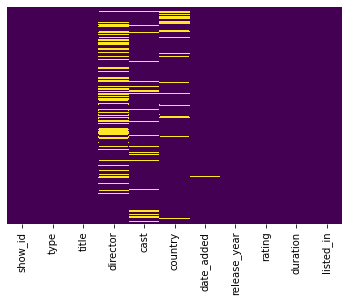

In [82]:
# printing the null values
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap="viridis")
plt.show()

Above plot, plots the column names with the corresponding null values present in them

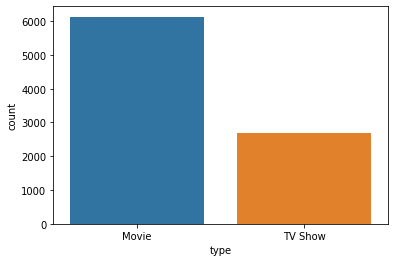

In [83]:
sns.countplot(x=df["type"]) # lets plot the number of movies and tv shows that are present on netflix
plt.show()

The above plot shows that number of movies in netflix are more then the number of TV shows.From this we can say that subscribers prefer watching movies over TV shows

**let us find the number of movies that actor(he/she) worked on?**

In [84]:
actors = df[["title", "cast"]] # Reading the title and cast columns from the dataset
actors.head()

,title,cast
0,Dick Johnson Is Dead,NaN
1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban..."
2,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi..."
3,Jailbirds New Orleans,NaN
4,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K..."


In [85]:
filtered_cast = actors[actors["cast"] != np.nan].set_index("title").cast.str.split(", ", expand=True).stack().reset_index(level=1, drop=True)
filtered_cast

title
Blood & Water               Ama Qamata
Blood & Water              Khosi Ngema
Blood & Water            Gail Mabalane
Blood & Water           Thabang Molaba
Blood & Water         Dillon Windvogel
                         ...          
Zubaan                Manish Chaudhary
Zubaan                    Meghna Malik
Zubaan                   Malkeet Rauni
Zubaan                  Anita Shabdish
Zubaan           Chittaranjan Tripathy
Length: 64126, dtype: object

In the above cell we are splitting the multiple valued column(i.e "cast") into multiple rows based on the movie

In [86]:
filtered_cast.value_counts()

Anupam Kher                43
Shah Rukh Khan             35
Julie Tejwani              33
Naseeruddin Shah           32
Takahiro Sakurai           32
                           ..
Maryam Zaree                1
Melanie Straub              1
Gabriela Maria Schmeide     1
Helena Zengel               1
Chittaranjan Tripathy       1
Length: 36439, dtype: int64

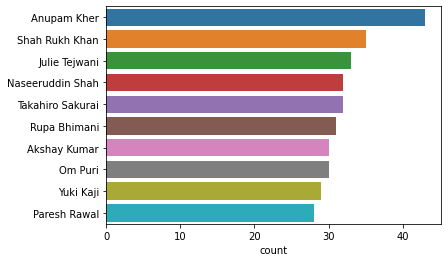

In [87]:
sns.countplot(y = filtered_cast, order=filtered_cast.value_counts().index[:10])
plt.show()

From the above plot we can get the number of movies that each actor worked on. from this we can recommend to invest
more in those movies which the top actors will be acting.

**Calculating the Most frequent director that an actor have worked with**

In [88]:
dir_actor = df[["director", "cast"]]

In [89]:
filtered_dir_actors = dir_actor[(dir_actor["cast"] != np.nan) & (dir_actor["director"] != np.nan)].set_index("director").cast.str.split(", ", expand=True).stack().reset_index(level=1, drop=True)
filtered_dir_actors

director
NaN                       Ama Qamata
NaN                      Khosi Ngema
NaN                    Gail Mabalane
NaN                   Thabang Molaba
NaN                 Dillon Windvogel
                       ...          
Mozez Singh         Manish Chaudhary
Mozez Singh             Meghna Malik
Mozez Singh            Malkeet Rauni
Mozez Singh           Anita Shabdish
Mozez Singh    Chittaranjan Tripathy
Length: 64126, dtype: object

In the above cell we are splitting the multivalued column into multiple rows

In [90]:
filtered_dir_actors = filtered_dir_actors.reset_index()

In [91]:
filtered_dir_actors.columns

Index(['director', 0], dtype='object')

In [92]:
filtered_dir_actors.rename(columns={0:"actor"}, inplace = True)

In [93]:
filtered_dir_actors

,director,actor
0,NaN,Ama Qamata
1,NaN,Khosi Ngema
2,NaN,Gail Mabalane
3,NaN,Thabang Molaba
4,NaN,Dillon Windvogel
...,...,...
64121,Mozez Singh,Manish Chaudhary
64122,Mozez Singh,Meghna Malik
64123,Mozez Singh,Malkeet Rauni
64124,Mozez Singh,Anita Shabdish


In [94]:
top_combinations = filtered_dir_actors.groupby(["director", "actor"]).size().sort_values(ascending=False)
# Here we are getting the count of actors who have worked with particular director

In [95]:
top_combinations

director          actor              
Rajiv Chilaka     Rajesh Kava            17
                  Julie Tejwani          17
                  Jigna Bhardwaj         17
                  Rupa Bhimani           16
                  Vatsal Dubey           15
                                         ..
Hiroyuki Seshita  Saori Hayami            1
                  Sora Amamiya            1
                  Takahiro Sakurai        1
                  Yuki Kaji               1
Şenol Sönmez      Özgür Emre Yıldırım     1
Length: 43089, dtype: int64

form the above the output we can say that Actors like Julie Tejwani, Jigna Bhardwaj, Rajesh Kava have worked more
with the director Rajiv Chilaka. In the same we can get the data for other actors

**The most popular actor/director for particular genre**

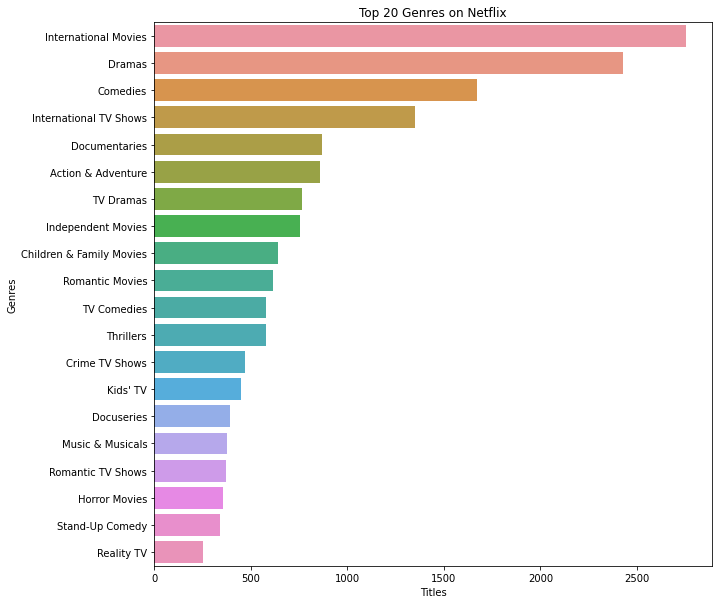

In [96]:
filtered_genres = df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(10,10))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

Above plot shows the Top 20 Genre, that are being watched on the Netflix. From this we can think of investing on the top 5 Genres, as it may lead to more profits.

In [97]:
filtered_genres

title
Dick Johnson Is Dead               Documentaries
Blood & Water             International TV Shows
Blood & Water                          TV Dramas
Blood & Water                       TV Mysteries
Ganglands                         Crime TV Shows
                                  ...           
Zoom                    Children & Family Movies
Zoom                                    Comedies
Zubaan                                    Dramas
Zubaan                      International Movies
Zubaan                          Music & Musicals
Length: 19323, dtype: object

In [98]:
# let us take the cast and listed_in columns
cast_lstedin = df[["title", "cast", "listed_in"]]
cast_lstedin.head()

,title,cast,listed_in
0,Dick Johnson Is Dead,NaN,Documentaries
1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...","International TV Shows, TV Dramas, TV Mysteries"
2,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...","Crime TV Shows, International TV Shows, TV Act..."
3,Jailbirds New Orleans,NaN,"Docuseries, Reality TV"
4,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...","International TV Shows, Romantic TV Shows, TV ..."


In [99]:
expanded_cast = cast_lstedin.loc[cast_lstedin["cast"]!=np.nan]["cast"].str.split(", ").to_list()
cast_lstedin["cast"] = expanded_cast

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [100]:
expanded_lstedin = cast_lstedin.loc[cast_lstedin["listed_in"]!=np.nan]["listed_in"].str.split(", ").to_list()
cast_lstedin["listed_in"] = expanded_lstedin

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [101]:
expanded_cast = cast_lstedin.explode("cast")

In [102]:
expanded_df = expanded_cast.explode("listed_in")

In [103]:
expanded_df
# dataframe with splitted cast & listed-in

,title,cast,listed_in
0,Dick Johnson Is Dead,NaN,Documentaries
1,Blood & Water,Ama Qamata,International TV Shows
1,Blood & Water,Ama Qamata,TV Dramas
1,Blood & Water,Ama Qamata,TV Mysteries
1,Blood & Water,Khosi Ngema,International TV Shows
...,...,...,...
8806,Zubaan,Anita Shabdish,International Movies
8806,Zubaan,Anita Shabdish,Music & Musicals
8806,Zubaan,Chittaranjan Tripathy,Dramas
8806,Zubaan,Chittaranjan Tripathy,International Movies


In [104]:
expanded_df.groupby("listed_in")["cast"].value_counts()

listed_in           cast               
Action & Adventure  Bruce Willis           13
                    Amitabh Bachchan       12
                    Anupam Kher            12
                    Shah Rukh Khan         11
                    Donnie Yen             10
                                           ..
Thrillers           Zygmunt Zintel          1
                    Àlex Monner             1
                    Álex García             1
                    Álvaro Cervantes        1
                    Étienne Rotha Moeng     1
Name: cast, Length: 113111, dtype: int64

From the table we can say the total type of movies a particular actor/actress has worked on

**Finding the total number of Movies / TV shows directed by a director in all genre**

In [105]:
dir_lstedin = df[["director", "listed_in"]]

In [106]:
dir_lstedin

,director,listed_in
0,Kirsten Johnson,Documentaries
1,NaN,"International TV Shows, TV Dramas, TV Mysteries"
2,Julien Leclercq,"Crime TV Shows, International TV Shows, TV Act..."
3,NaN,"Docuseries, Reality TV"
4,NaN,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...
8802,David Fincher,"Cult Movies, Dramas, Thrillers"
8803,NaN,"Kids' TV, Korean TV Shows, TV Comedies"
8804,Ruben Fleischer,"Comedies, Horror Movies"
8805,Peter Hewitt,"Children & Family Movies, Comedies"


In [107]:
expanded_lsted = dir_lstedin.loc[dir_lstedin["listed_in"]!=np.nan]["listed_in"].str.split(", ").to_list()
dir_lstedin["listed_in"] = expanded_lsted

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [108]:
dir_lstedin = dir_lstedin.explode("listed_in")
dir_lstedin

,director,listed_in
0,Kirsten Johnson,Documentaries
1,NaN,International TV Shows
1,NaN,TV Dramas
1,NaN,TV Mysteries
2,Julien Leclercq,Crime TV Shows
...,...,...
8805,Peter Hewitt,Children & Family Movies
8805,Peter Hewitt,Comedies
8806,Mozez Singh,Dramas
8806,Mozez Singh,International Movies


In [109]:
dir_lstedin.groupby("director")["listed_in"].value_counts()

director          listed_in           
A. L. Vijay       Comedies                2
                  International Movies    2
                  Dramas                  1
                  Sci-Fi & Fantasy        1
A. Raajdheep      Dramas                  1
                                         ..
Ömer Faruk Sorak  Romantic Movies         1
Şenol Sönmez      Comedies                2
                  International Movies    2
                  Dramas                  1
                  Romantic Movies         1
Name: listed_in, Length: 10936, dtype: int64

From the above table we can get the data of a director on the different genre he have worked on. From this we can suggest them to work on those genre of TV shows/ Movies.

**Now let us calclate the Film rating**

In [110]:
ratings = df["rating"].unique()
ratings

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

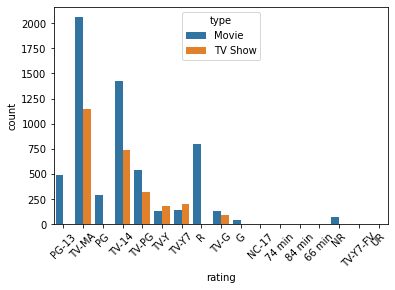

In [111]:
plot = sns.countplot(x="rating", data=df, hue="type")
plot.set_xticklabels(
    plot.get_xticklabels(), 
    rotation=45
)
plt.show()

The above plot gives the information on which age of audience are most subscribed. Among them more Movies are watched over TV Shows

**now let us print the type of movies that a subscribers of a particular country like to watch**

In [112]:
country_lstedin = df[["country", "listed_in"]]

In [113]:
country_lstedin

,country,listed_in
0,United States,Documentaries
1,South Africa,"International TV Shows, TV Dramas, TV Mysteries"
2,NaN,"Crime TV Shows, International TV Shows, TV Act..."
3,NaN,"Docuseries, Reality TV"
4,India,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...
8802,United States,"Cult Movies, Dramas, Thrillers"
8803,NaN,"Kids' TV, Korean TV Shows, TV Comedies"
8804,United States,"Comedies, Horror Movies"
8805,United States,"Children & Family Movies, Comedies"


In [114]:
expanded_lsted = country_lstedin.loc[country_lstedin["listed_in"]!=np.nan]["listed_in"].str.split(", ").to_list()
country_lstedin["listed_in"] = expanded_lsted

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [115]:
country_lstedin = country_lstedin.explode("listed_in")

In [116]:
country_lstedin.groupby("country")["listed_in"].value_counts().sort_values(ascending=False)

country                                                              listed_in           
India                                                                International Movies    817
                                                                     Dramas                  620
United States                                                        Dramas                  591
                                                                     Comedies                524
                                                                     Documentaries           411
                                                                                            ... 
Israel, Germany, Poland, Luxembourg, Belgium, France, United States  International Movies      1
                                                                     Sci-Fi & Fantasy          1
Israel, Sweden, Germany, Netherlands                                 Documentaries             1
                                     

From the above statistics, we can get the Kind of genre is most viewed in a country. So promoting such kind of 
Genre Movies/ TV Shows can lead to profits.
As it is clear that *International Movies & Dramas* are being most watched in *India* compared to others

**Lets calculate in which year dramas are streamed more**

In [117]:
month_added = pd.DatetimeIndex(df['date_added']).month
df["month_added"] = month_added
year_added = pd.DatetimeIndex(df['date_added']).year
df["year_added"] = year_added

In [118]:
dramas = df[df.listed_in.str.contains('Dramas')]
year_month = dramas.groupby('year_added')["month_added"].value_counts().unstack().fillna(0).T

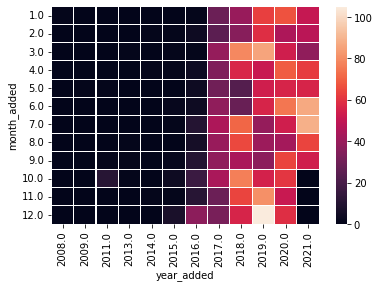

In [119]:
sns.heatmap(year_month, linewidths=0.025)
plt.show()

From the above HeatMap we can say that from the midst of 2018 to September of 2021, there was a sudden surge in the movies /TV Shows being watched as the mentioned period was prevalent of COVID.
recently there has been a sudden downfall in the number of subscribers because of withdrawing from Russia and Rise in inflation.

**The most Popular movies / TV shows released in a country**

In [120]:
df.groupby("country")["title"].count().sort_values(ascending=False)

country
United States                                                                          2818
India                                                                                   972
United Kingdom                                                                          419
Japan                                                                                   245
South Korea                                                                             199
                                                                                       ... 
Ireland, Canada, Luxembourg, United States, United Kingdom, Philippines, India            1
Ireland, Canada, United Kingdom, United States                                            1
Ireland, Canada, United States, United Kingdom                                            1
Ireland, France, Iceland, United States, Mexico, Belgium, United Kingdom, Hong Kong       1
Zimbabwe                                                                

From the above statistics, we can see that USA has most number of TV Shows/ Movies released.

**Finding if there are any Directors who have directed movies as well as TV-shows**

In [121]:
movie = df[df['type']=='Movie'][["show_id", "director"]]

In [122]:
show = df[df["type"] == "TV Show"][["show_id", "director"]]

In [123]:
movie.rename(columns = {"show_id":"id"}, inplace = True)
movie.head()

,id,director
0,s1,Kirsten Johnson
6,s7,"Robert Cullen, José Luis Ucha"
7,s8,Haile Gerima
9,s10,Theodore Melfi
12,s13,Christian Schwochow


In [124]:
show.head()

,show_id,director
1,s2,NaN
2,s3,Julien Leclercq
3,s4,NaN
4,s5,NaN
5,s6,Mike Flanagan


In [125]:
movie.merge(show, how="inner", left_on="id", right_on = "show_id")

,id,director_x,show_id,director_y


we can see that There is no single Director who has worked in both Movies and TV Shows

**Does Netflix has more focus on TV Shows than movies in recent years**

In [126]:
number_of_recent_movies = len(df.loc[(df["type"]=="Movie") & (pd.DatetimeIndex(df['date_added']).year >= 2019)]["title"])
number_of_tv_shows = len(df.loc[(df["type"]=="TV Show") & (pd.DatetimeIndex(df['date_added']).year >= 2019)]["title"])
number_of_recent_movies, number_of_tv_shows

(3701, 1692)

**From the above result From 2019, Netflix has Focused more on Movies compared to TV Shows**